# Graafikakaartide võrdlus

Pakkus huvi erinevate graafikakaartide võrdlus nii tootjate (**AMD** vs. **Nvidia**) arvestuses kui ka võimalust ennustada tunnuste alusel tootjat.


Leidsin, et kõigile graafikakaartidele on vaja mingisugust võrdlusalust, seetõttu täiendasin kõiki graafikakaartide andmeid Benchmark atribuudiga. 

Aluseks võtsin [PassMark Software](https://www.videocardbenchmark.net/high_end_gpus.html) videokaartide Benchmarkide andmebaasi, kuna antud andmebaas sisaldas enamus andmestikus leiduvaid graafikakaarte. Nende graafikakaartide testimise metoodikast saab lugeda [SIIT](https://www.videocardbenchmark.net/gpu_test_info.html).

Puuduolevate graafikakaartide (mõningad AMD kaardid, arvuliselt ~5-7) jaoks kasutasin [TechPowerUp](https://www.techpowerup.com/gpu-specs/) graafikakaartide andmebaasi, mis andis mulle võimsuse protsendi, teiste võrreldavate graafikakaartidele PassMark'i andmebaaasis. Nende suhete põhjal sain ma täiendada puuduolevad graafikakaartide Benchmarkid.

# Graafikakaartide andmestik

In [170]:
#imports
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import pip

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve

In [171]:
#GPU_df = pd.read_csv('GPU.csv', header=None,index_col = 0).sample(frac=1)
#GPU_df.to_csv('GPU.csv')

GPU_df = pd.read_csv("GPU.csv",delimiter=';', index_col = 0, names =["GPU name","GPU brand","Clock speed (MHz)","Turbo clock speed (MHz)","Memory clock speed (MHz)",
                                    "Effective memory clock speed (MHz)", "Memory bus (bit)", "Memory (MB)", "Memory type","Shading units",
                                    "Texture mapping units","Render output processors","Benchmark (G3D Mark)"])
GPU_df = GPU_df.drop(index = ["HD6970 Dual-X","RX580XTR"])
GPU_df

,GPU brand,Clock speed (MHz),Turbo clock speed (MHz),Memory clock speed (MHz),Effective memory clock speed (MHz),Memory bus (bit),Memory (MB),Memory type,Shading units,Texture mapping units,Render output processors,Benchmark (G3D Mark)
GPU name,,,,,,,,,,,,
HD7870XT,AMD,925,975,1500,6000,256,2048,GDDR5,1536,96,32,4471
GTX550Ti,Nvidia,900,900,1026,4104,192,1024,GDDR5,192,32,24,1924
GTX TITAN X,Nvidia,1000,1089,1753,7012,384,12288,GDDR5,3072,192,96,13666
R9 285,AMD,918,1000,1375,5500,256,2048,GDDR5,1792,112,32,5553
R9 390 X2,AMD,1000,1000,1350,5400,1024,16384,GDDR5,5120,320,128,9553
GTX1070Ti,Nvidia,1607,1683,2002,8008,256,8192,GDDR5,2432,152,64,12349
HD7750,AMD,800,800,1125,4500,128,1024,GDDR5,512,32,16,1708
GTX660,Nvidia,823,888,1400,5600,256,2048,GDDR5,1152,96,32,4129
RX570,AMD,1168,1244,1750,7000,256,4096,GDDR5,2048,128,32,6860


**AMD** puhul selgus, et andmestikku on sattunud paar duplikaati, nimelt **RX580XTR** ning **HD6970 Dual-X**, mis on samade mudelite, OEM tootjate poolt toodetud kaardid. Seetõttu otsustasin eemaldada antud kaartide mudelid andmestikust, kuna mõjutaksid lõppanalüüsi.


In [172]:
description = "" 
with open("graafikakaardid_info.txt", "r") as f:
    for line in f.readlines():
        description += line

print(description)

﻿Allikas: http://gpuboss.com/

Andmestikus on 100 lauaarvuti graafikakaarti.

Atribuudid:
1) GPU name; tekst; mudeli nimetus
2) GPU brand; tekst; mudeli tootja (klass)
3) Clock speed (MHz); täisarv
4) Turbo clock speed (MHz); täisarv
5) Memory clock speed (MHz); täisarv
6) Effective memory clock speed (MHz); täisarv
7) Memory bus (bit) ; täisarv
8) Memory (MB) ; täisarv
9) Memory type; tekst
10) Shading units; täisarv
11) Texture mapping units; täisarv
12) Render output processors; täisarv
13) Benchmark (G3D Mark); täisarv

Klass (GPU brand):
1) Nvidia
2) AMD


### Vaatleme muutujaid andmestikus
Korrelatsioonitabeliga on võimalik näha, et omavahelises seoses on graafikakaartide protsessori ja mälu kiirused, kuid ka erinevad väljundüksused.

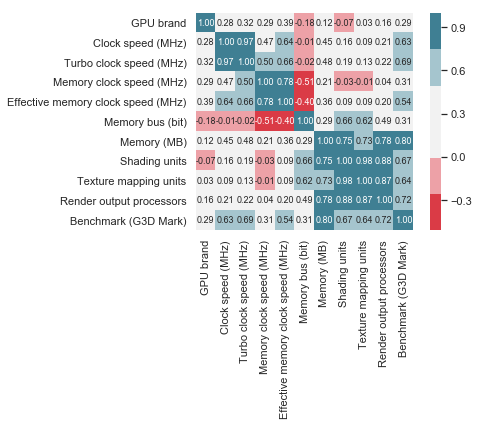

In [173]:
X = GPU_df.replace("Nvidia",1).replace("AMD",0).drop(columns=["Memory type"])
# pd.concat([GPU_df.drop(columns=["Memory type"]),pd.get_dummies(GPU_df["Memory type"])],axis=1)
cm = np.corrcoef(X.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 9}, yticklabels=X.columns,
                 xticklabels=X.columns, 
                 cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

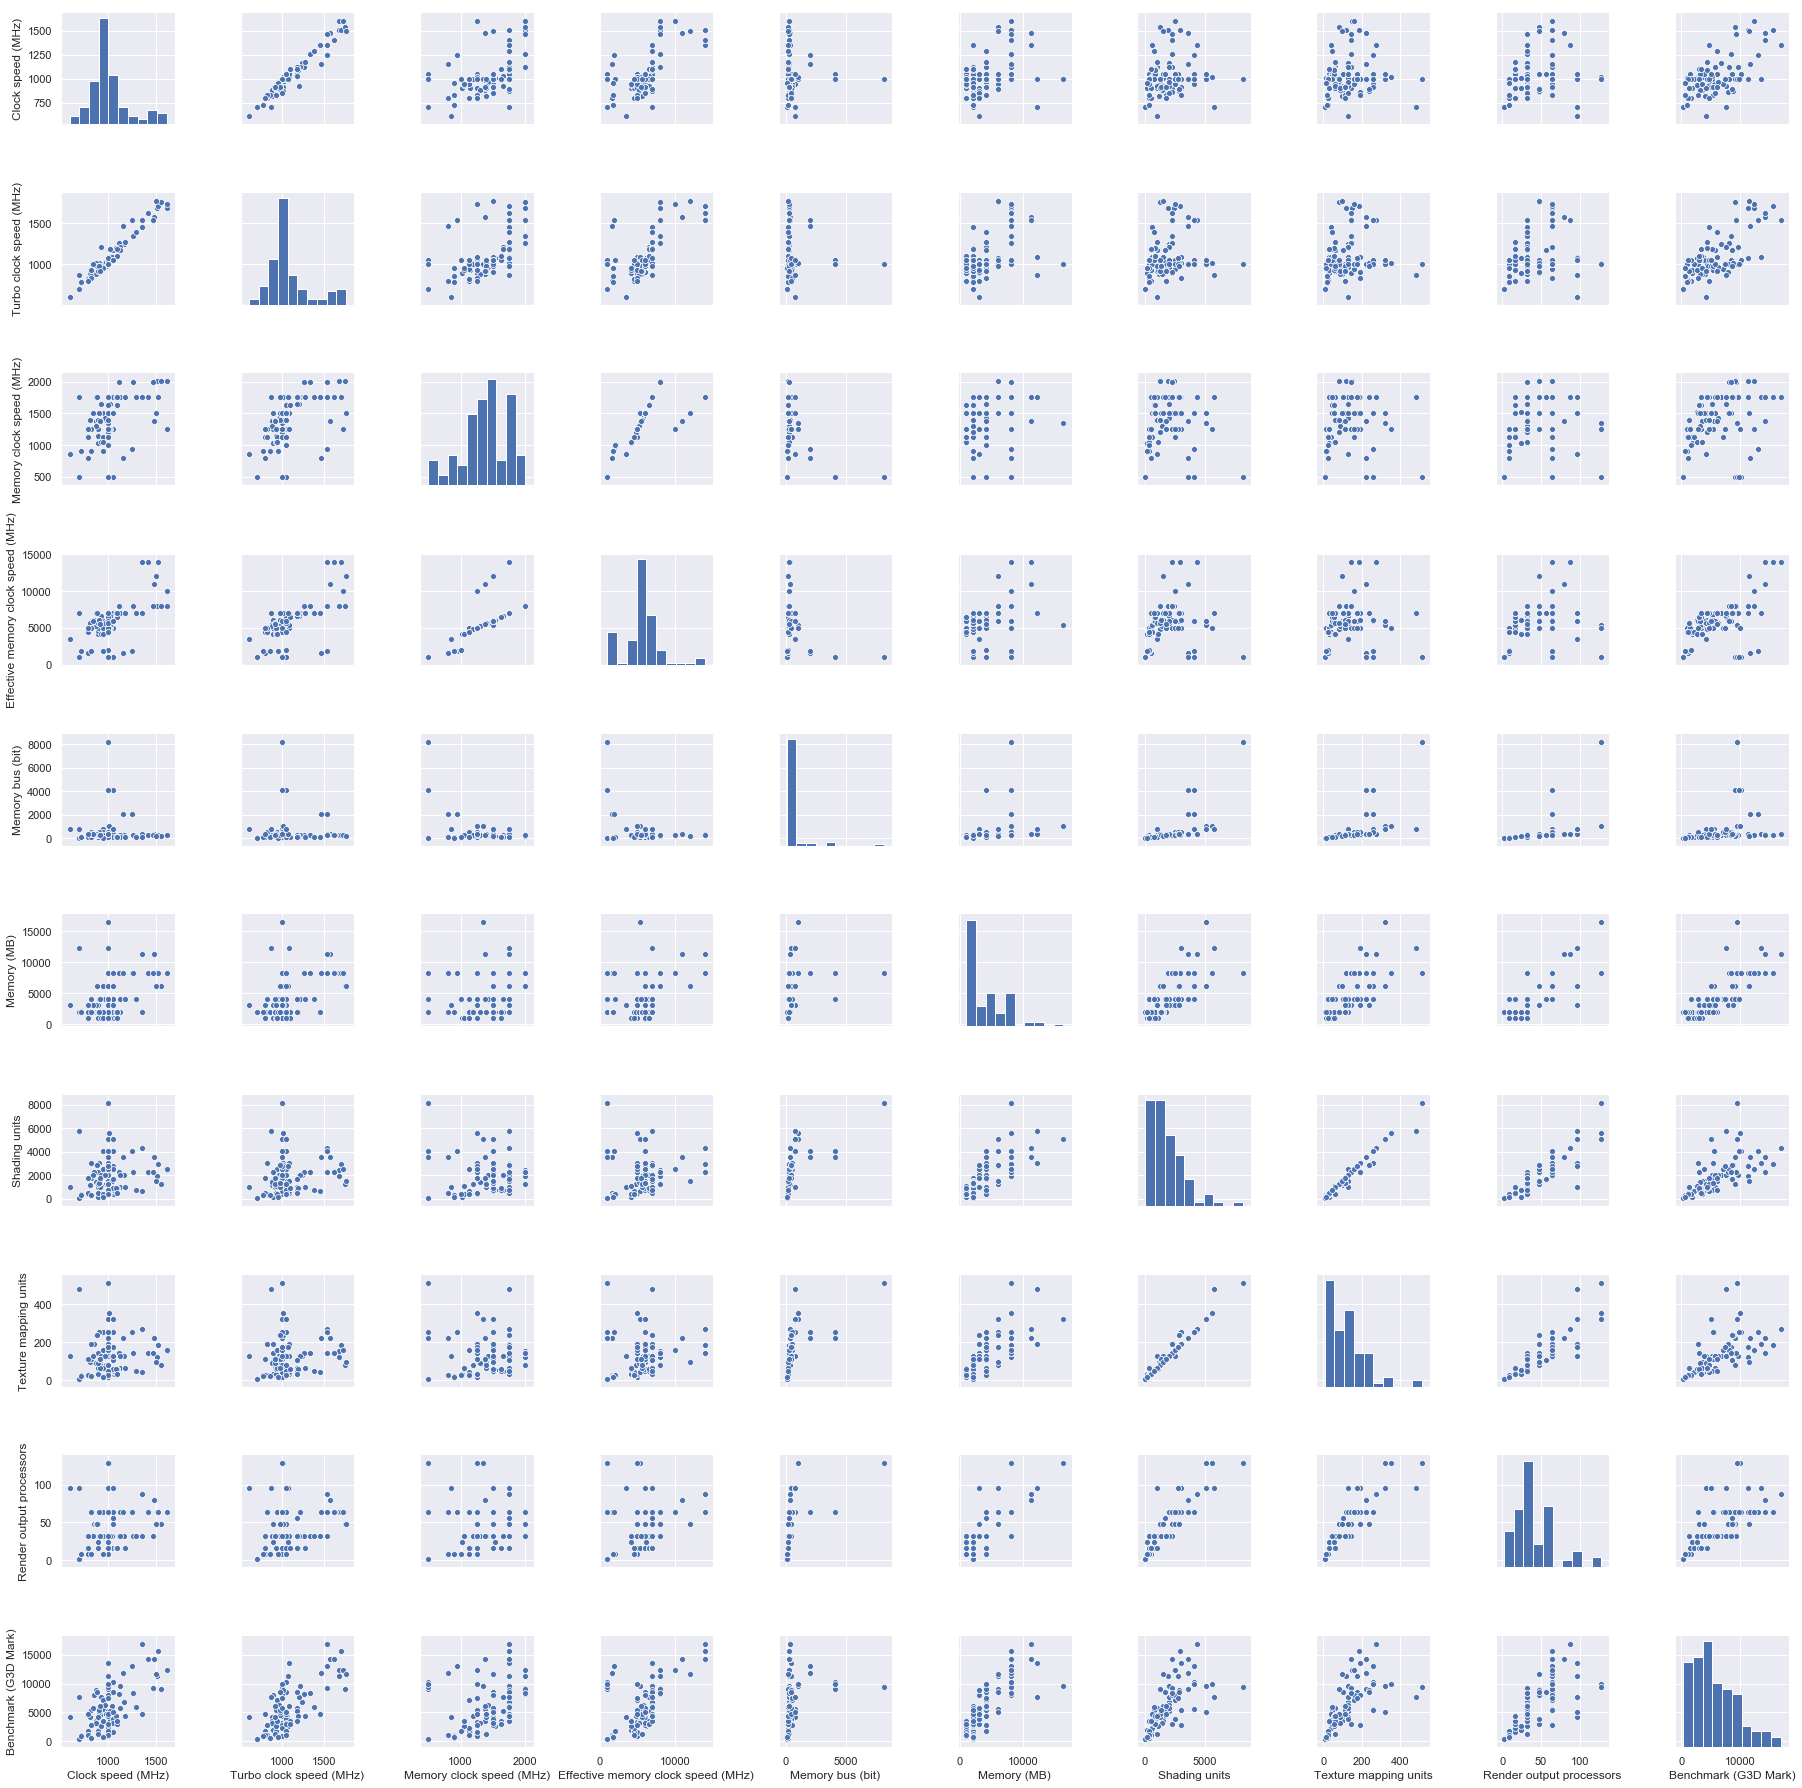

In [174]:
df2 = GPU_df[GPU_df.keys()]
sns.pairplot(df2)
plt.show()

## Andmestiku keskväärtus ning standardhälve
### Tootjate arvestuses

In [175]:
print("Mean")
GPU_df.groupby(["GPU brand"]).mean().sort_values(by='Benchmark (G3D Mark)', ascending=True)

Mean


,Clock speed (MHz),Turbo clock speed (MHz),Memory clock speed (MHz),Effective memory clock speed (MHz),Memory bus (bit),Memory (MB),Shading units,Texture mapping units,Render output processors,Benchmark (G3D Mark)
GPU brand,,,,,,,,,,
AMD,983.131148,1027.163934,1311.803279,4985.081967,668.459016,3777.049180,1929.442623,119.901639,37.508197,5016.327869
Nvidia,1098.891892,1190.702703,1522.648649,7012.000000,266.378378,4538.810811,1731.027027,125.351351,46.756757,7285.702703


In [176]:
print("Standard Deviation")
GPU_df.drop(columns=["Memory type"]).groupby(["GPU brand"]).std(ddof=1).sort_values(by='Benchmark (G3D Mark)', ascending=True)

Standard Deviation


,Clock speed (MHz),Turbo clock speed (MHz),Memory clock speed (MHz),Effective memory clock speed (MHz),Memory bus (bit),Memory (MB),Shading units,Texture mapping units,Render output processors,Benchmark (G3D Mark)
GPU brand,,,,,,,,,,
AMD,129.923500,165.057281,349.658205,1855.166320,1327.629084,2869.277624,1551.459362,97.008884,28.753332,3014.574358
Nvidia,271.749965,319.182016,338.425949,2955.742133,160.542025,3460.289630,1280.310173,95.036898,26.738866,4520.264495


### Üle kogu andmestiku

In [177]:
GPU_df.describe()

,Clock speed (MHz),Turbo clock speed (MHz),Memory clock speed (MHz),Effective memory clock speed (MHz),Memory bus (bit),Memory (MB),Shading units,Texture mapping units,Render output processors,Benchmark (G3D Mark)
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1026.836735,1088.908163,1391.408163,5750.346939,516.653061,4064.653061,1854.530612,121.959184,41.000000,5873.132653
std,202.559890,247.006076,358.729885,2519.262354,1066.872905,3110.307477,1451.409711,95.813384,28.232101,3798.329906
min,608.000000,608.000000,500.000000,1000.000000,64.000000,1024.000000,48.000000,8.000000,2.000000,351.000000
25%,915.000000,951.000000,1212.500000,5000.000000,128.000000,2048.000000,768.000000,49.500000,16.000000,3103.000000
50%,1000.000000,1019.500000,1462.500000,6000.000000,256.000000,3072.000000,1536.000000,108.000000,32.000000,4882.000000
75%,1050.000000,1158.500000,1652.250000,7000.000000,384.000000,6144.000000,2560.000000,160.000000,64.000000,8498.250000
max,1607.000000,1770.000000,2002.000000,14000.000000,8192.000000,16384.000000,8192.000000,512.000000,128.000000,16939.000000


## Histogrammid

AMD       61
Nvidia    37
Name: GPU brand, dtype: int64


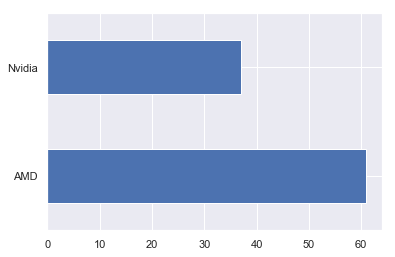

In [178]:
print(GPU_df['GPU brand'].value_counts())
GPU_df['GPU brand'].value_counts().plot.barh()

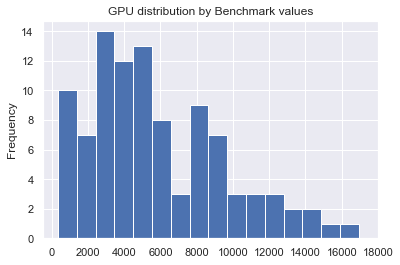

In [179]:
GPU_df["Benchmark (G3D Mark)"].plot.hist(bins=16,xticks = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000],yticks = [0,2,4,6,8,10,12,14],grid=True,title="GPU distribution by Benchmark values")

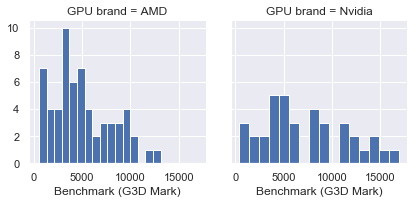

In [180]:
g = sns.FacetGrid(GPU_df, col='GPU brand')
g.map(plt.hist, 'Benchmark (G3D Mark)', bins=16)

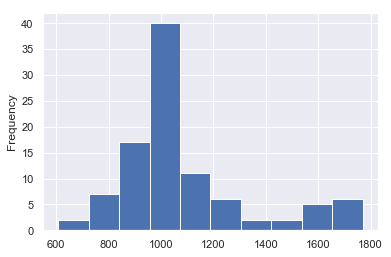

In [181]:
GPU_df["Turbo clock speed (MHz)"].plot.hist()

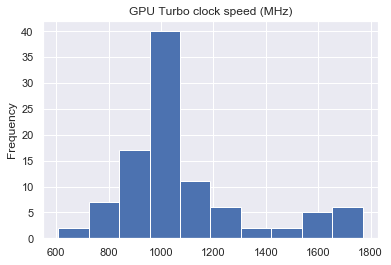

In [182]:
GPU_df["Turbo clock speed (MHz)"].plot.hist(grid=True,title="GPU Turbo clock speed (MHz)")

# Tootja tüübi ennustamine

Loome aksepteeritava mudeli tootja leidmiseks

In [194]:
pred_df = pd.concat([GPU_df.drop(columns=["Memory type"]),pd.get_dummies(GPU_df["Memory type"])],axis=1)
#pred_df = GPU_df.drop(columns=["Memory type"])
target = pred_df["GPU brand"].values
GPU_features = pred_df.drop(columns=["GPU brand"])
GPU_features_array = GPU_features.values
#      ,"Benchmark (G3D Mark)"


features_train, features_test, target_train, target_test = train_test_split(
    GPU_features_array, target, test_size=0.2, random_state=1)

Erinevate mudelite testimisel koos ristkontrolliga selgus, et kõige edukama tulemuse andis **Perceptron**. Dokumentatsiooni alusel, sai valitud **Cross Validation** arvuks 10.

In [206]:
predictive_model = Perceptron(max_iter=100, eta0=0.1, random_state=0) # 3
predictive_model1 = LogisticRegression(penalty='l1', C=1,max_iter=100, random_state=0) # 6
predictive_model2 = DecisionTreeClassifier(max_depth=100, random_state=0) # 5
predictive_model3 = SVC(max_iter=100, random_state=0) # 11
predictive_model5 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=6)

predictive_models = [predictive_model, predictive_model1, predictive_model2, predictive_model3, predictive_model5, ]

for predictive_model in predictive_models:
    brand_pipe = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('pm', predictive_model)])
    
    brand_pipe.fit(features_train, target_train)
    print('Täpsus testandmetega: ', brand_pipe.score(features_test,target_test))
    brand_pred = brand_pipe.predict(features_test)
    print(brand_pred != target_test)
    print(target_test)

Täpsus testandmetega:  0.85
[False False  True False False False False False False False False False
  True False False False False False False  True]
['Nvidia' 'AMD' 'Nvidia' 'Nvidia' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD'
 'Nvidia' 'AMD' 'AMD' 'AMD' 'Nvidia' 'Nvidia' 'Nvidia' 'AMD' 'AMD'
 'Nvidia']
Täpsus testandmetega:  0.75
[ True False  True  True False False False False False  True False False
 False False False False False False False  True]
['Nvidia' 'AMD' 'Nvidia' 'Nvidia' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD'
 'Nvidia' 'AMD' 'AMD' 'AMD' 'Nvidia' 'Nvidia' 'Nvidia' 'AMD' 'AMD'
 'Nvidia']
Täpsus testandmetega:  0.7
[False False  True False False False False  True  True  True False False
 False False False False  True False False  True]
['Nvidia' 'AMD' 'Nvidia' 'Nvidia' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD' 'AMD'
 'Nvidia' 'AMD' 'AMD' 'AMD' 'Nvidia' 'Nvidia' 'Nvidia' 'AMD' 'AMD'
 'Nvidia']
Täpsus testandmetega:  0.65
[ True False  True  True False False False False False False False False
  T

In [207]:
for predictive_model in predictive_models:
    brand_pipe = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('pm', predictive_model)])
    scores = cross_val_score(estimator=brand_pipe,
                             X=features_train,
                             y=target_train,
                             cv=10,
                             n_jobs=6)

    print('CV täpsused: ', scores)
    print('CV keskmine täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
    print("\n")

CV täpsused:  [0.875 1.    1.    1.    1.    0.875 0.625 0.875 0.875 1.   ]
CV keskmine täpsus: 0.912 +/- 0.113


CV täpsused:  [1.    1.    1.    0.875 1.    0.875 0.625 0.75  0.75  1.   ]
CV keskmine täpsus: 0.887 +/- 0.131


CV täpsused:  [0.875 0.625 0.875 0.75  1.    0.75  0.875 0.875 1.    1.   ]
CV keskmine täpsus: 0.863 +/- 0.118


CV täpsused:  [0.75       0.75       0.75       0.5        0.875      0.625
 0.75       0.625      0.75       0.83333333]
CV keskmine täpsus: 0.721 +/- 0.104


CV täpsused:  [0.75       0.875      1.         0.875      1.         0.875
 0.75       0.875      0.875      0.83333333]
CV keskmine täpsus: 0.871 +/- 0.080




## Leiame õppimis- ja validatsioonikõverad antud andmete jaoks.

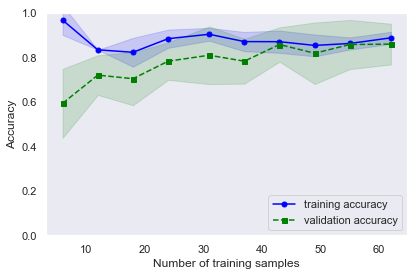

In [192]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l1', C=1, random_state=1))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=features_train,
                               y=target_train,
                               train_sizes=np.linspace(0.1, 1.0, 10, 100),
                               cv=5,
                               n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

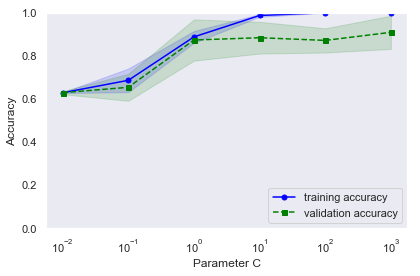

In [193]:
# valideerimiskõver

param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=features_train, 
                y=target_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

## Eksimismaatriks graafikakaartide tootja ennustusele

Ennustusviga: 0.15
Täpsus: 0.85
[[11  1]
 [ 2  6]]


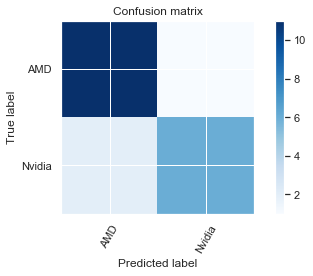

In [208]:
from sklearn.metrics import confusion_matrix

pipe_lr = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('pm', predictive_model5)])

pipe_lr.fit(features_train, target_train)
target_pred = pipe_lr.predict(features_test)
confmat = confusion_matrix(y_true=target_test, y_pred=target_pred)

def plot_confusion(cm, target_names = ['AMD', 'Nvidia'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()


cm_normalized = confmat.astype(np.float64) / confmat.sum(axis=1)[:, np.newaxis]
plot_confusion(confmat)
err = str((confmat[1,0] + confmat[0,1])/(confmat[0,0]+confmat[0,1]+confmat[1,0]+confmat[1,1]))
acc = str(1 - float((confmat[1,0] + confmat[0,1])/(confmat[0,0]+confmat[0,1]+confmat[1,0]+confmat[1,1])))
print("Ennustusviga: "+ err)
print("Täpsus: "+ acc)
print(confmat)


### Ansambelõppe meetodid graafikakaartide tootjate ennustamiseks

In [150]:
#Bagging
clf_prp = Perceptron(max_iter=10)
clf_pipe_b = Pipeline([('sc1', StandardScaler()),
                       ('bc', BaggingClassifier(base_estimator=clf_prp,
                                                n_estimators=100,
                                                bootstrap_features=True))])

clf_pipe_b.fit(features_train, target_train)
print("Täpsus:", clf_pipe_b.score(features_test, target_test))

Täpsus: 0.75


In [151]:
#AdaBoost
clf_pipe_ab = Pipeline([('sc1', StandardScaler()),
                       ('ab', AdaBoostClassifier(n_estimators=10))])

clf_pipe_ab.fit(features_train, target_train)
print("Täpsus:", clf_pipe_ab.score(features_test, target_test))

Täpsus: 0.75


In [152]:
#Cross validating Bagging
scores = cross_val_score(estimator=clf_pipe_b,
                         X=features_train,
                         y=target_train,
                         cv=5,
                         n_jobs=6)

print('CV täpsused: ', scores)
print('CV keskmine täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
print("\n")

CV täpsused:  [0.9375     0.9375     0.875      0.75       0.85714286]
CV keskmine täpsus: 0.871 +/- 0.069




Mitte nii täpne kui **Perceptron**.

### Klasterdada graafikakaardide andmeid
Üritan klasterdada nö "tootjate järgi" ning vaatlen erinevaid andmete klasterdamise viise

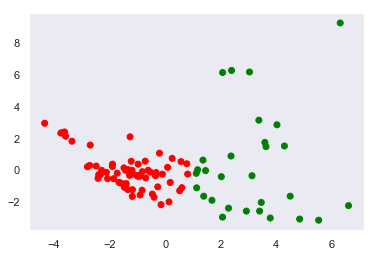

In [153]:
Yww = GPU_df["GPU brand"].values
Xww = StandardScaler().fit_transform(GPU_features_array)
pca = PCA(n_components=2)
Xww = pca.fit_transform(Xww)

km_w = KMeans(n_clusters=2,
           init='random',
           n_init=10,
           max_iter=300,
           tol=0.00001,
           random_state=0)

colormap = {0: "red", 1: "green", 2: "blue", 
            3: "orange", 4: "cyan", 5: "yellow",
            6: "purple", 7: "brown", 8: "black"}

%matplotlib inline
y_km_w = km_w.fit_predict(Xww)
y_km_w
plt.scatter(Xww[:, 0], Xww[:, 1], c=[colormap[c_id] for c_id in y_km_w])
plt.grid()
plt.show()

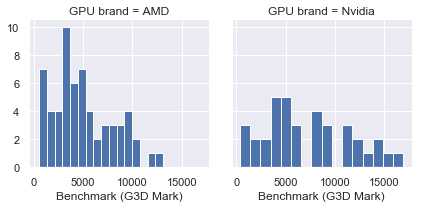

In [154]:
g = sns.FacetGrid(GPU_df, col='GPU brand')
g.map(plt.hist, 'Benchmark (G3D Mark)', bins=16)

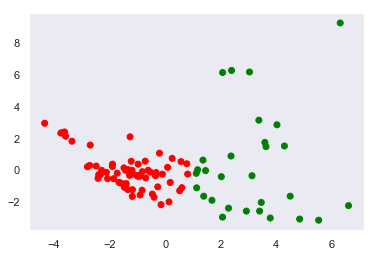

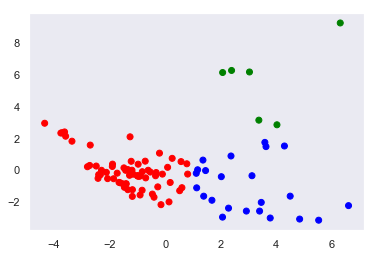

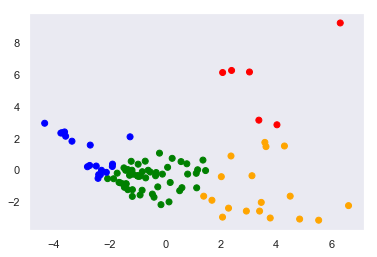

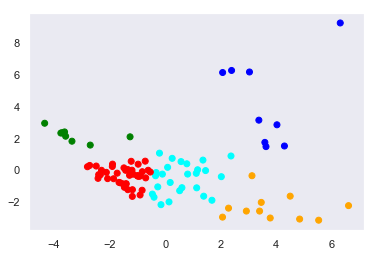

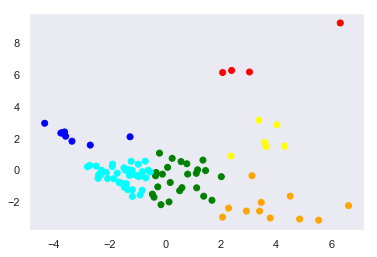

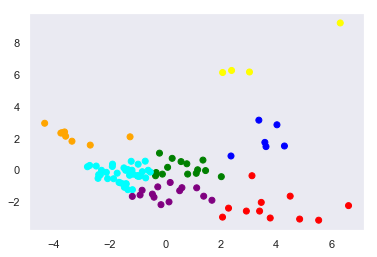

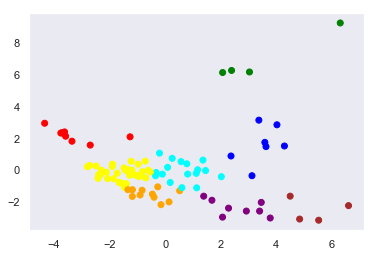

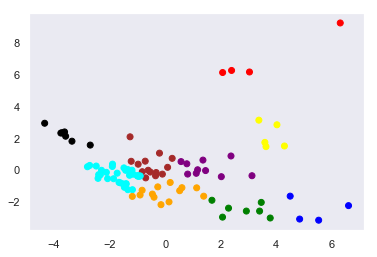

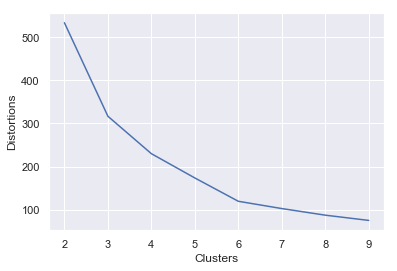

In [155]:
distortions = []
for i in range(2, 10):
    km_w.set_params(n_clusters=i)
    y_km = km_w.fit_predict(Xww)
    plt.scatter(Xww[:, 0], Xww[:, 1], c=[colormap[c_id] for c_id in y_km])
    plt.grid()
    plt.show()
    distortions.append(km_w.inertia_)
    
plt.plot(range(2, 10), distortions)
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.show()

In [156]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def draw_silhouette_plots(X, range_n_clusters = range(2, 10)):

# See kood on võetud suuresti 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5001703331356941
For n_clusters = 3 The average silhouette_score is : 0.5023454986584981
For n_clusters = 4 The average silhouette_score is : 0.40810679826070506
For n_clusters = 5 The average silhouette_score is : 0.4804829113892919
For n_clusters = 6 The average silhouette_score is : 0.45692983710006374
For n_clusters = 7 The average silhouette_score is : 0.3712024917040443
For n_clusters = 8 The average silhouette_score is : 0.3843094065886843
For n_clusters = 9 The average silhouette_score is : 0.3819454062976701


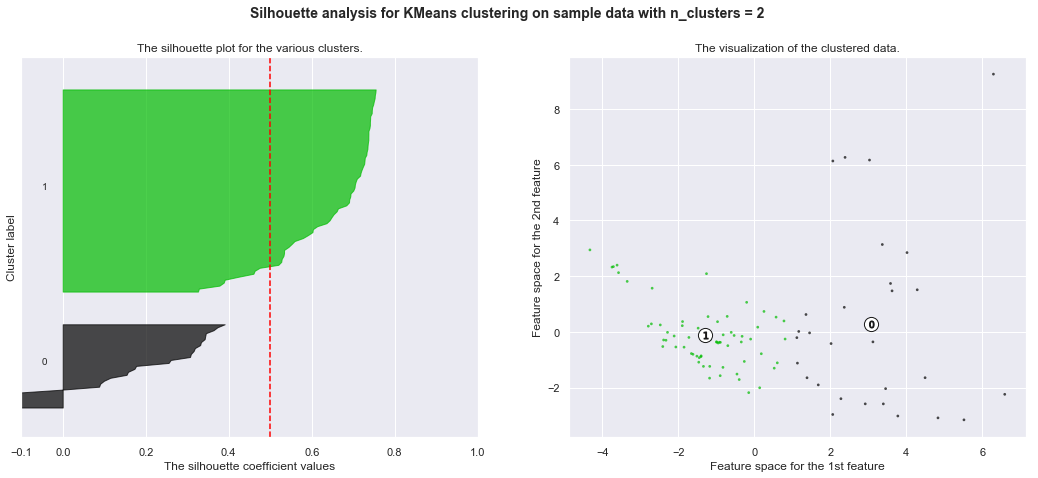

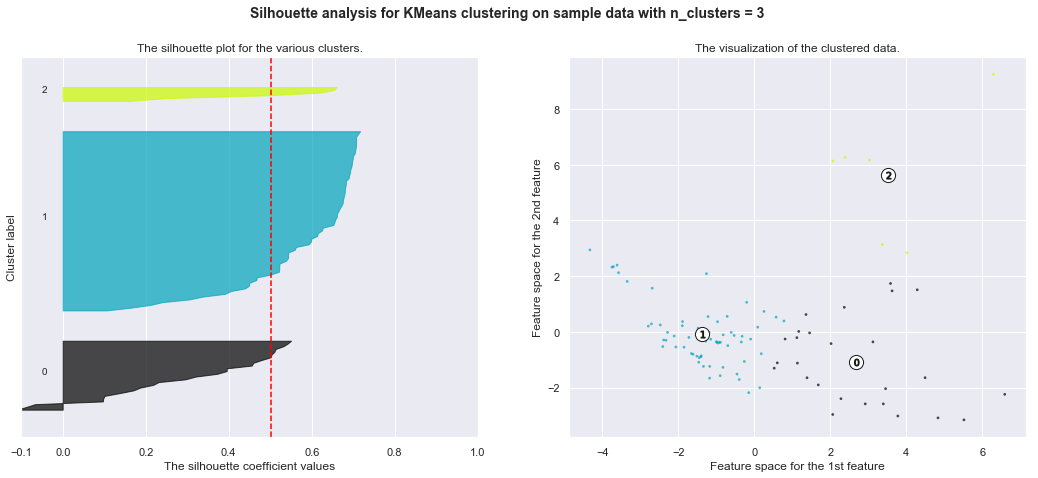

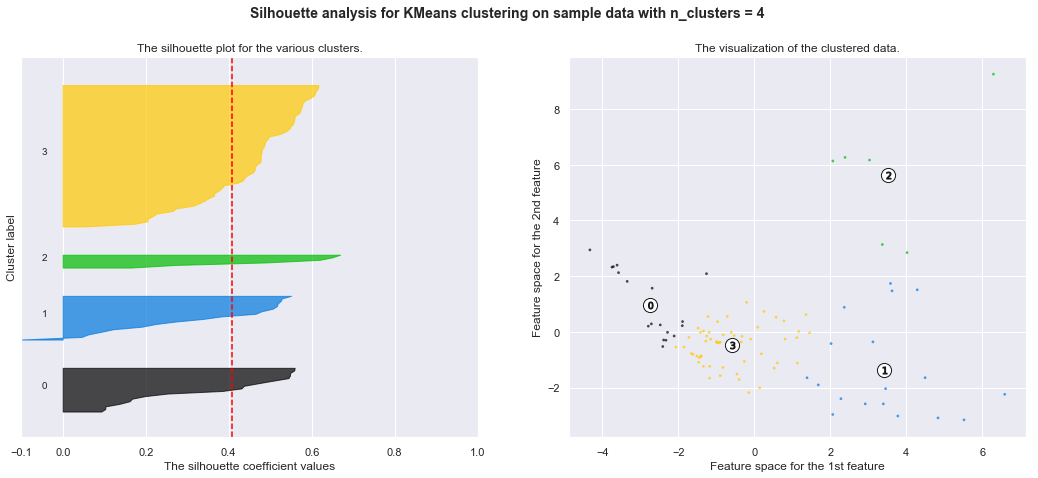

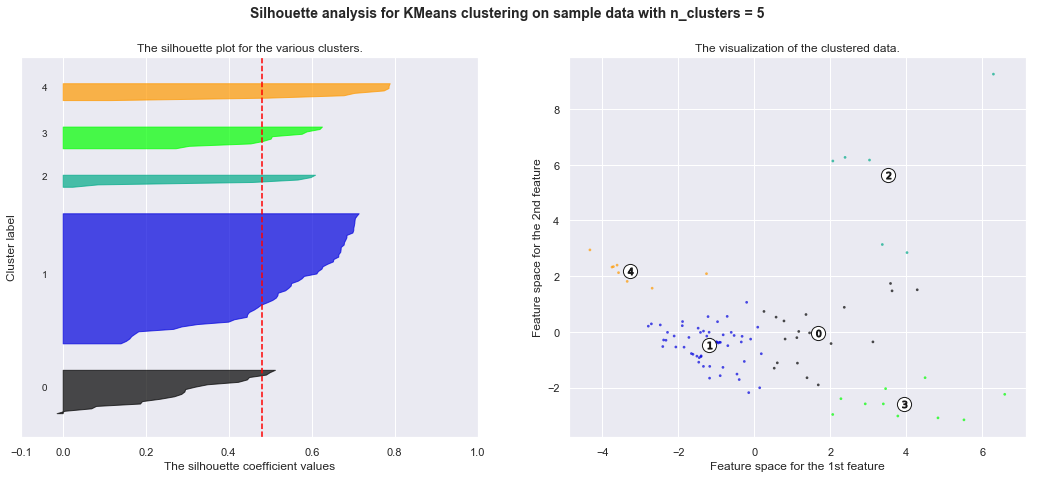

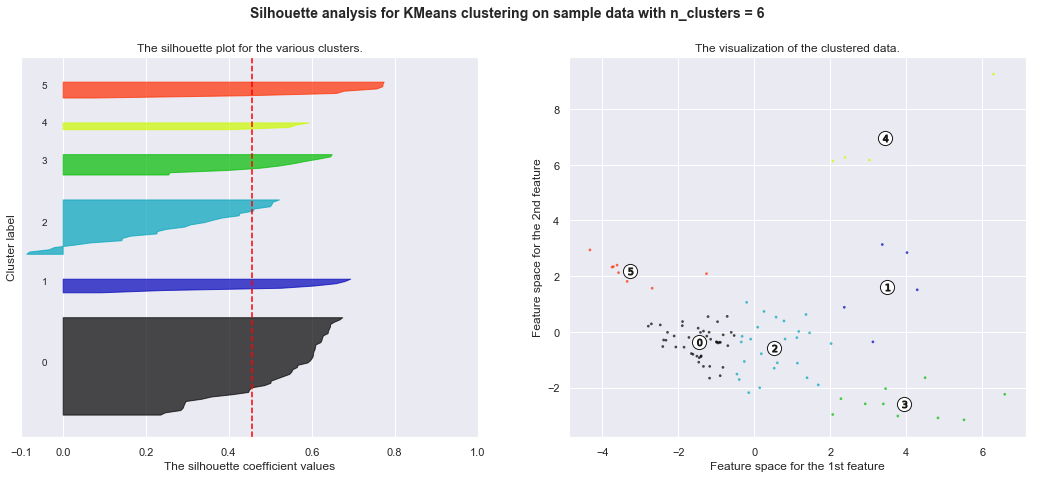

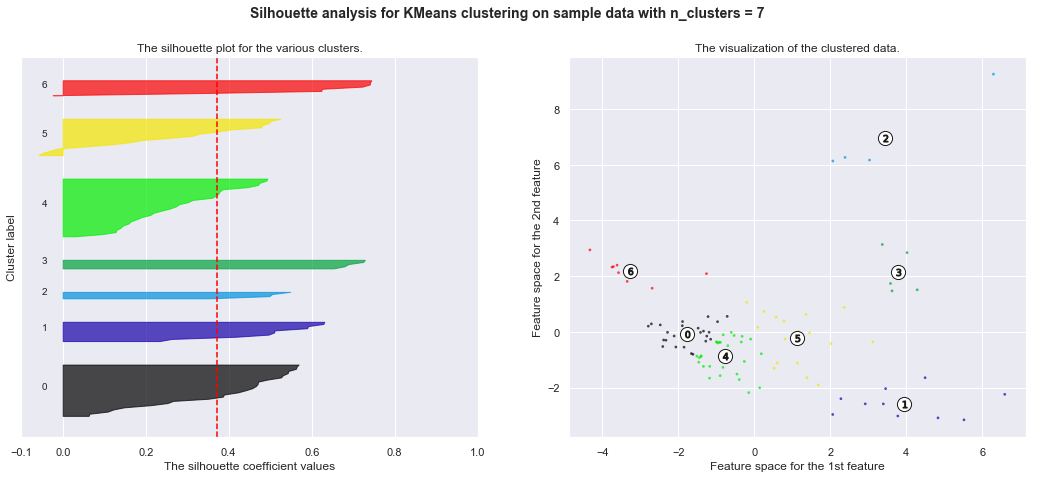

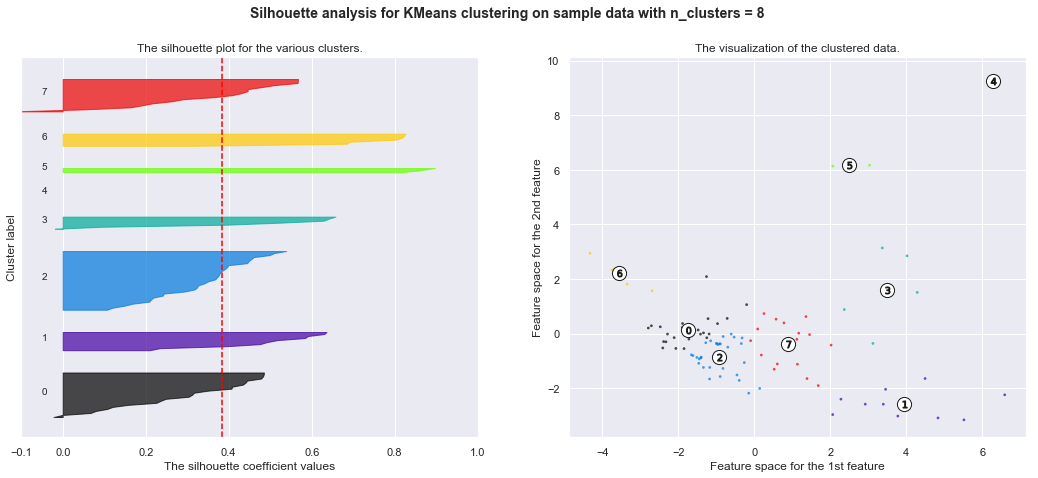

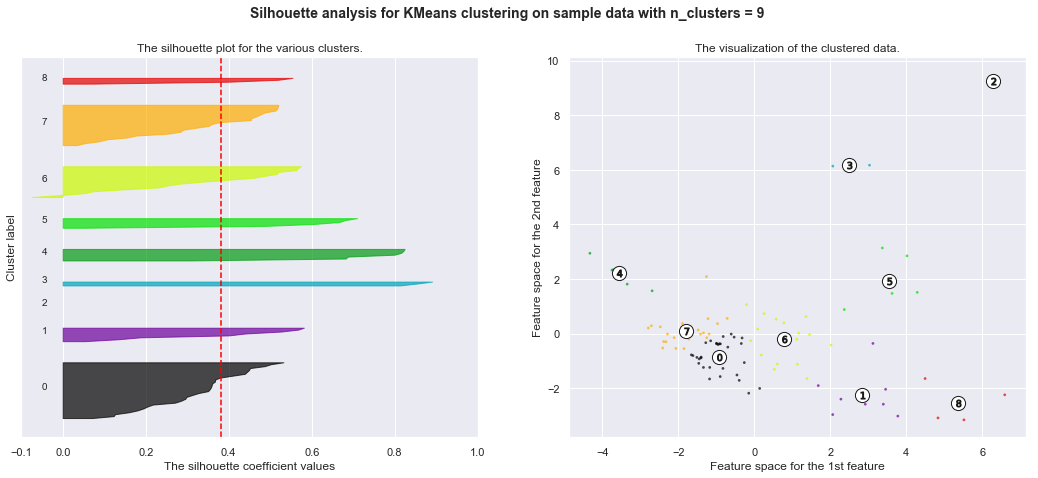

In [157]:
draw_silhouette_plots(Xww)

# Benchmarkide ennustamine hinnavahemikeks

Ennustuse vahemikeks võtame 3000 punktiväärtused vahed.

In [158]:
print("Average Benchmark by GPU manufacturer")
GPU_df[["GPU brand", "Benchmark (G3D Mark)"]].groupby(["GPU brand"], as_index=False).mean().sort_values(by='Benchmark (G3D Mark)', ascending=True)

Average Benchmark by GPU manufacturer


,GPU brand,Benchmark (G3D Mark)
0,AMD,5016.327869
1,Nvidia,7285.702703


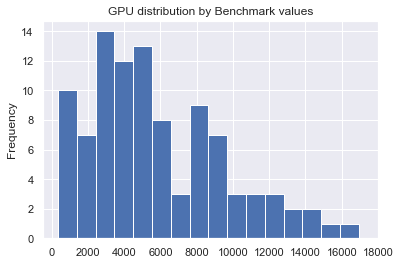

In [159]:
GPU_df["Benchmark (G3D Mark)"].plot.hist(bins=16,xticks = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000],yticks = [0,2,4,6,8,10,12,14],grid=True,title="GPU distribution by Benchmark values")

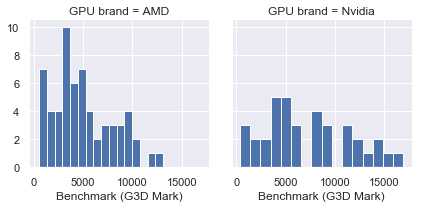

In [160]:
g = sns.FacetGrid(GPU_df, col='GPU brand')
g.map(plt.hist, 'Benchmark (G3D Mark)', bins=16)

In [161]:
pred_df = pd.concat([GPU_df.drop(columns=["Memory type"]),pd.get_dummies(GPU_df["Memory type"])],axis=1)
pred_df['Scaled Benchmark'] = pred_df.apply(lambda row: (int(row["Benchmark (G3D Mark)"] / 3000)), axis = 1) 
predictions = pred_df["Scaled Benchmark"]
pred_df = pred_df.drop(columns=["Scaled Benchmark", "Benchmark (G3D Mark)"]).replace("AMD", 0).replace("Nvidia",1)
data = pred_df.values
predictions_data = predictions.values

features_train, features_test, target_train, target_test = train_test_split(
    data, predictions_data, test_size=0.2, random_state=1)

predictive_model = Perceptron(max_iter=100, eta0=0.1, random_state=0) # 3
predictive_model1 = LogisticRegression(penalty='l2', C=0.01,max_iter=100, random_state=0) # 6
predictive_model2 = DecisionTreeClassifier(max_depth=100, random_state=0) # 5
predictive_model3 = SVC(max_iter=100, random_state=0) # 11
predictive_model5 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=6)

predictive_models = [predictive_model, predictive_model1, predictive_model2, predictive_model3, predictive_model5, ]

for predictive_model in predictive_models:
    brand_pipe = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('pm', predictive_model)])
    
    brand_pipe.fit(features_train, target_train)
    print('Täpsus testandmetega: ', brand_pipe.score(features_test,target_test))
    brand_pred = brand_pipe.predict(features_test)
    print(brand_pred != target_test)
    print(target_test)

Täpsus testandmetega:  0.55
[False False  True  True  True False False False False False  True False
  True False False  True  True  True  True False]
[2 1 1 1 2 1 1 1 3 3 2 1 3 1 1 1 4 1 2 0]
Täpsus testandmetega:  0.7
[False False False False  True False  True False False False  True False
  True False False  True  True False False False]
[2 1 1 1 2 1 1 1 3 3 2 1 3 1 1 1 4 1 2 0]
Täpsus testandmetega:  0.7
[ True False False False False  True  True False False False  True False
 False False False  True False False False  True]
[2 1 1 1 2 1 1 1 3 3 2 1 3 1 1 1 4 1 2 0]
Täpsus testandmetega:  0.7
[ True False False False False False  True False False False  True False
  True False False  True  True False False False]
[2 1 1 1 2 1 1 1 3 3 2 1 3 1 1 1 4 1 2 0]
Täpsus testandmetega:  0.85
[False False False False False False False False False False  True False
  True False False  True False False False False]
[2 1 1 1 2 1 1 1 3 3 2 1 3 1 1 1 4 1 2 0]


In [162]:
for predictive_model in predictive_models:
    brand_pipe = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('pm', predictive_model)])

    scores = cross_val_score(estimator=brand_pipe,
                             X=features_train,
                             y=target_train,
                             cv=5,
                             n_jobs=6)

    print('CV täpsused: ', scores)
    print('CV keskmine täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
    print("\n")

CV täpsused:  [0.41176471 0.35294118 0.6875     0.78571429 0.71428571]
CV keskmine täpsus: 0.590 +/- 0.174


CV täpsused:  [0.52941176 0.58823529 0.6875     0.78571429 0.57142857]
CV keskmine täpsus: 0.632 +/- 0.093


CV täpsused:  [0.52941176 0.47058824 0.5625     0.57142857 0.64285714]
CV keskmine täpsus: 0.555 +/- 0.056


CV täpsused:  [0.52941176 0.58823529 0.8125     0.71428571 0.5       ]
CV keskmine täpsus: 0.629 +/- 0.118


CV täpsused:  [0.58823529 0.52941176 0.75       0.78571429 0.5       ]
CV keskmine täpsus: 0.631 +/- 0.116




## Leiame õppimis- ja validatsioonikõverad antud andmete jaoks.

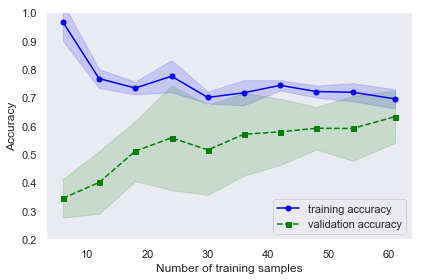

In [163]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', C=0.01, random_state=1))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=features_train,
                               y=target_train,
                               train_sizes=np.linspace(0.1, 1.0, 10, 100),
                               cv=5,
                               n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

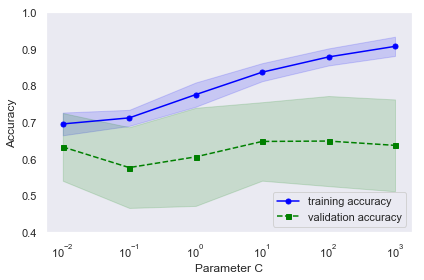

In [164]:
# valideerimiskõver

param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=features_train, 
                y=target_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

### Ansambelõppe meetodid Benchmarkide ennustamiseks

In [165]:
#Bagging
clf_prp = Perceptron(max_iter=10)
clf_pipe_b = Pipeline([('sc1', StandardScaler()),
                       ('bc', BaggingClassifier(base_estimator=clf_prp,
                                                n_estimators=100,
                                                bootstrap_features=True))])

clf_pipe_b.fit(features_train, target_train)
print("Täpsus:", clf_pipe_b.score(features_test, target_test))

Täpsus: 0.75


In [166]:
#AdaBoost
clf_pipe_ab = Pipeline([('sc1', StandardScaler()),
                       ('ab', AdaBoostClassifier(n_estimators=10))])

clf_pipe_ab.fit(features_train, target_train)
print("Täpsus:", clf_pipe_ab.score(features_test, target_test))

Täpsus: 0.65


In [167]:
#Cross validating Bagging
scores = cross_val_score(estimator=clf_pipe_b,
                         X=features_train,
                         y=target_train,
                         cv=5,
                         n_jobs=6)

print('CV täpsused: ', scores)
print('CV keskmine täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
print("\n")

CV täpsused:  [0.47058824 0.52941176 0.625      0.92857143 0.64285714]
CV keskmine täpsus: 0.639 +/- 0.158




Mitte nii täpne kui **Random Forest**.

# Tähelepanekud

* Täpsemaks ennustamiseks oleks hea saada ka graafikakaartidele hinnad
* Mida suurem on Benchmark vahemik, seda täpsem on ennustus
